<a href="https://colab.research.google.com/github/YallamrajuLokesh/FirstModel/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
teams=pd.read_csv("teams.csv")

In [5]:
teams


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [6]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [7]:
teams


,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [12]:
teams = teams.fillna(0)




In [13]:
correlation_matrix = teams.corr()
print(correlation_matrix["medals"])


ValueError: could not convert string to float: 'AFG'

In [14]:
teams_numeric = teams.select_dtypes(include=['number'])


In [15]:
print(teams_numeric.columns)


Index(['year', 'athletes', 'age', 'prev_medals', 'medals'], dtype='object')


In [16]:
correlation_matrix = teams_numeric.corr()
print(correlation_matrix["medals"]) // correlation are 0 to 1 scale for athletes and prev medals its very high


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.909139
medals         1.000000
Name: medals, dtype: float64


In [17]:
import seaborn as sns //python graphic library called seaborn

In [18]:
sns.plot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)

AttributeError: module 'seaborn' has no attribute 'plot'

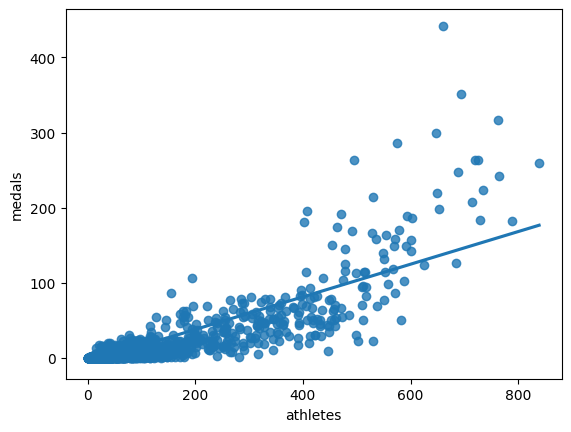

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.regplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

# Show the plot
plt.show()


<Axes: xlabel='age', ylabel='medals'>

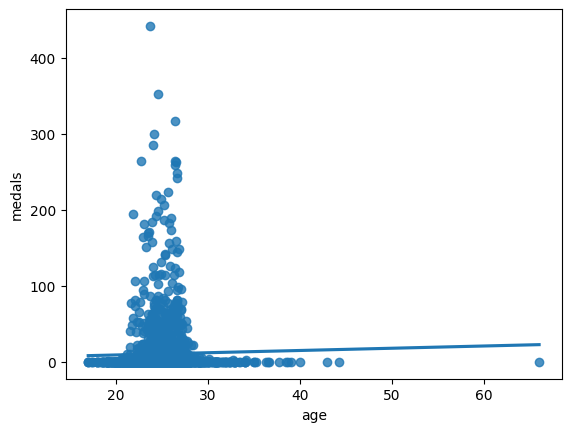

In [20]:
sns.regplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

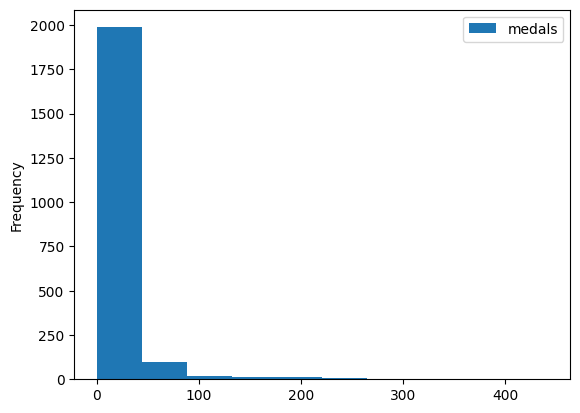

In [21]:
teams.plot.hist(y="medals")

In [22]:
teams=teams.dropna()

In [23]:
train=teams[teams["year"]<2012].copy()
team=teams[teams["year"]>2012].copy()


In [27]:
train.shape


(1736, 7)

In [28]:
team.shape

(204, 7)

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [31]:
predictors=["athletes","prev_medals"]
target=["medals"]

In [32]:
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [33]:
predictions=reg.predict(team[predictors])

In [34]:
predictions

array([-1.38329907e+00, -1.84626647e+00,  4.49972044e+00, -2.01198533e+00,
       -1.89077881e-01, -1.59768819e+00,  3.03993329e+01,  2.60843465e+00,
       -1.76340704e+00, -2.01198533e+00,  1.21693971e+02,  4.69962847e+00,
        1.04893346e+01,  3.65141806e+00, -1.76340704e+00, -1.26625047e+00,
       -1.51482876e+00,  1.12258153e+01, -1.84626647e+00, -1.68054762e+00,
       -2.17770419e+00, -1.43196933e+00, -2.09484476e+00,  2.57881670e+01,
       -1.34910990e+00, -4.71845340e-01,  8.79448206e+01,  1.10248382e+00,
       -2.09484476e+00,  3.88551526e+00, -1.92912590e+00, -1.84626647e+00,
       -1.84626647e+00,  7.03496593e+01, -1.92912590e+00, -1.51482876e+00,
       -2.17770419e+00,  1.55097014e+00,  1.27946645e+02, -1.10053161e+00,
       -5.20515600e-01, -2.01198533e+00, -1.59768819e+00,  1.63578730e+01,
       -2.01198533e+00, -1.92912590e+00, -1.34910990e+00,  3.02666033e+01,
        1.94671152e+01,  1.08170668e-01,  1.88042397e+01,  2.08902066e+01,
       -1.68054762e+00, -

In [35]:
team["predictions"]=predictions

In [36]:
team

,team,country,year,athletes,age,prev_medals,medals,predictions
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.383299
25,ALB,Albania,2016,6,23.7,0.0,0,-1.846266
38,ALG,Algeria,2016,74,24.0,1.0,2,4.499720
49,AND,Andorra,2016,4,26.0,0.0,0,-2.011985
58,ANG,Angola,2016,26,27.5,0.0,0,-0.189078
...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,28,26.9,0.0,2,-0.023359
2099,VIN,Saint Vincent and the Grenadines,2016,4,20.8,0.0,0,-2.011985
2111,YEM,Yemen,2016,3,19.3,0.0,0,-2.094845
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.763407


In [38]:
team.loc[team["predictions"]<0,"predictions"]=0

In [39]:
team["predictions"]=team["predictions"].round()

In [40]:
team

,team,country,year,athletes,age,prev_medals,medals,predictions
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
38,ALG,Algeria,2016,74,24.0,1.0,2,4.0
49,AND,Andorra,2016,4,26.0,0.0,0,0.0
58,ANG,Angola,2016,26,27.5,0.0,0,0.0
...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,28,26.9,0.0,2,0.0
2099,VIN,Saint Vincent and the Grenadines,2016,4,20.8,0.0,0,0.0
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0


In [41]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(team["medals"],team["predictions"])

In [42]:
error

3.5441176470588234

In [43]:
teams.describe()["medals"]

,medals
count,2144.000000
mean,10.556437
std,33.028143
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,442.000000


//error below standard deviation//

In [44]:
team[team["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2054,USA,United States,2016,719,26.4,248.0,264,234.0


In [45]:
team[team["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
908,IND,India,2016,130,26.1,6.0,2,13.0


In [51]:
errors=(team["medals"]-team["predictions"]).abs()

In [52]:
errors

,0
7,0.0
25,0.0
38,2.0
49,0.0
58,0.0
...,...
2091,2.0
2099,0.0
2111,0.0
2132,0.0


In [53]:
error_by_team=errors.groupby(team["team"]).mean()

In [54]:
error_by_team

,0
team,
AFG,0.0
ALB,0.0
ALG,2.0
AND,0.0
ANG,0.0
...,...
VIE,2.0
VIN,0.0
YEM,0.0


In [55]:
medals=team["medals"].groupby(team["team"]).mean()

In [56]:
medals


,medals
team,
AFG,0.0
ALB,0.0
ALG,2.0
AND,0.0
ANG,0.0
...,...
VIE,2.0
VIN,0.0
YEM,0.0


In [57]:
error_ratio=error_by_team/medals

In [58]:
error_ratio

,0
team,
AFG,NaN
ALB,NaN
ALG,1.0
AND,NaN
ANG,NaN
...,...
VIE,1.0
VIN,NaN
YEM,NaN


In [59]:
error_ratio[~pd.isnull(error_ratio)]

,0
team,
ALG,1.000000
ARG,0.363636
ARM,0.250000
AUS,0.487805
AUT,1.500000
...,...
UKR,1.600000
USA,0.113636
UZB,0.538462


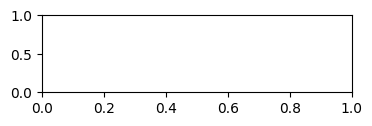

In [62]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]

In [63]:
error_ratio

,0
team,
ALG,1.000000
ARG,0.363636
ARM,0.250000
AUS,0.487805
AUT,1.500000
...,...
UKR,1.600000
USA,0.113636
UZB,0.538462


<Axes: ylabel='Frequency'>

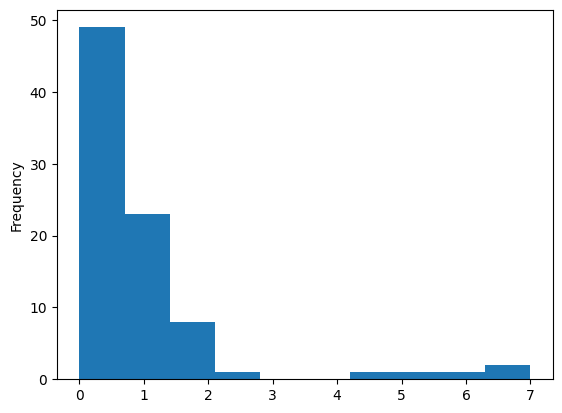

In [64]:
error_ratio.plot.hist()

In [65]:
error_ratio.sort_values()

,0
team,
NZL,0.000000
TPE,0.000000
CAN,0.014493
FRA,0.020833
SWE,0.035714
...,...
MEX,4.200000
IND,5.500000
FIN,6.000000
